# Assignment 3
In this assignment, you will be coding two new (nn.Module)s that implement a Linear layer and BatchNorm. Then you will use them to train a conv net over multiple datasets.

Submitted:

*   Hadar Pur
*   Rotem Feinblat




In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import math

**Datasets**
In this assignment you will only use training sets. Here, I only load CIFAR10, but you should load the following datasets, which you will use later:


*   CIFAR10
*   Fashion-MNIST
*  KMNIST




In [ ]:
# CIFAR10
cifar10_trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transforms.ToTensor())
cifar10_trainloader = torch.utils.data.DataLoader(cifar10_trainset, batch_size=64,
                                          shuffle=True)

# TODO - load more datasets

# Fashion-MNIST
fmnist_trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                          download=True, transform=transforms.ToTensor())
fmnist_trainloader = torch.utils.data.DataLoader(fmnist_trainset, batch_size=64,
                                            shuffle=True)

# KMNIST
kmnist_trainset = torchvision.datasets.KMNIST(root='./data', train=True,
                                          download=True, transform=transforms.ToTensor())
kmnist_trainloader = torch.utils.data.DataLoader(kmnist_trainset, batch_size=64,
                                            shuffle=True)



Failed download. Trying https -> http instead. Downloading http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz to ./data/cifar-10-python.tar.gz


Extracting ./data/cifar-10-python.tar.gz to ./data


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw





Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting ./data/KMNIST/raw/train-images-idx3-ubyte.gz to ./data/KMNIST/raw


Extracting ./data/KMNIST/raw/train-labels-idx1-ubyte.gz to ./data/KMNIST/raw




Extracting ./data/KMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/KMNIST/raw


Extracting ./data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/KMNIST/raw
Processing...
Done!


# Neural net
This is our vanilla CNN for this experiment. The sizes of the Linear layers were designed for CIFAR10, the first dataset you should experiment with. Later, you will have to change those numbers to fit the other datasets.

In [ ]:
class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # now a few fully connected layers
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [ ]:
# training loop
def train(model, trainloader):
  # define loss function
  criterion = nn.CrossEntropyLoss()
      
  # define the optimizer
  optimizer = torch.optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9)

  # define loss array
  loss_array = []

  for epoch in range(100):  
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
      # get the inputs
      inputs, labels = data
          
      inputs = inputs.cuda() # -- For GPU
      labels = labels.cuda() # -- For GPU

      # zero the parameter gradients
      optimizer.zero_grad()

      # forward + backward + optimize
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      # print statistics
      running_loss += loss.item()      
      if i % 200 == 0 and i > 1 :    
        loss_array.append(running_loss/200)
        print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 200))
        running_loss = 0.0

  print('Finished Training')
  return loss_array

In [ ]:
# Creating the network 
netRegular = CNN().cuda()    # -- For GPU

print('Start Training for regular net')
regular_loss = train(netRegular, cifar10_trainloader)

Start Training for regular net
[1,   201] loss: 2.315
[1,   401] loss: 2.303
[1,   601] loss: 2.303
[2,   201] loss: 2.314
[2,   401] loss: 2.303
[2,   601] loss: 2.302
[3,   201] loss: 2.314
[3,   401] loss: 2.302
[3,   601] loss: 2.302
[4,   201] loss: 2.313
[4,   401] loss: 2.301
[4,   601] loss: 2.301
[5,   201] loss: 2.312
[5,   401] loss: 2.299
[5,   601] loss: 2.297
[6,   201] loss: 2.301
[6,   401] loss: 2.278
[6,   601] loss: 2.246
[7,   201] loss: 2.103
[7,   401] loss: 2.047
[7,   601] loss: 2.020
[8,   201] loss: 1.986
[8,   401] loss: 1.960
[8,   601] loss: 1.946
[9,   201] loss: 1.920
[9,   401] loss: 1.895
[9,   601] loss: 1.878
[10,   201] loss: 1.837
[10,   401] loss: 1.789
[10,   601] loss: 1.777
[11,   201] loss: 1.701
[11,   401] loss: 1.673
[11,   601] loss: 1.654
[12,   201] loss: 1.621
[12,   401] loss: 1.601
[12,   601] loss: 1.565
[13,   201] loss: 1.550
[13,   401] loss: 1.537
[13,   601] loss: 1.528
[14,   201] loss: 1.501
[14,   401] loss: 1.486
[14,   601] 

In [ ]:
def create_plot(array1, array2, label1, label2, x_label, y_label, title):
  
  # plot
  plt.figure(figsize=(10,5)) 
  plt.plot(array1, label = label1, color = "blue")
  plt.plot(array2, label = label2, color = "red")
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  plt.legend(loc = 'upper right')
  plt.grid()
  plt.show()

# Task 1
Implement a nn.Module that immitates nn.Linear, with additional support for Dropout. In other words, this module should take three arguments: input dimension, output dimension and the keep_prop probability for dropout. Make sure to wrap your parameter tensors with nn.Parameter.

In [ ]:
# TODO: Implement the following Module. Size is the length of the input vectors.

class MyLinear(nn.Module):
  
    def __init__(self, input_dim, output_dim, keep_prob):
      super(MyLinear, self).__init__()

      # saving
      self.input_dim = input_dim
      self.output_dim = output_dim
      self.keep_prob = keep_prob

      # init
      self.w = nn.Parameter(torch.Tensor(self.output_dim, self.input_dim))
      self.b = nn.Parameter(torch.zeros(self.output_dim))

      # RELU nets
      nn.init.kaiming_uniform_(self.w, a = math.sqrt(5))

      # dropout
      prob = 1 - self.keep_prob
      self.drop = nn.Dropout(p = prob)

    def forward(self, x):
      x = torch.mm(self.w, x.T)
      x = x.T + self.b
      return self.drop(x)

# Task 2
You should add your new MyLinear Module to our CNN. Simply replace fc1, fc2, and fc3 with your new module, this time with keep_prob=1. Then, train the network over CIFAR10 with and without your Module, and compare the loss curves (plot both of them onto the same figure, with two different colors).



In [ ]:
# You code for Task 2 goes here. Note - you don't have to copy the entire network here, just modify everything in place, run it, and collect the losses. Then, here write your plots.

class myCNN(nn.Module):
  
  def __init__(self, keep_prob):
    super(myCNN, self).__init__()

    self.conv1 = nn.Conv2d(3, 6, 5)
    self.conv2 = nn.Conv2d(6, 16, 5)

    # replace fc1..3
    self.fc1 = MyLinear(input_dim = 16 * 5 * 5, output_dim = 120, keep_prob = keep_prob)
    self.fc2 = MyLinear(input_dim = 120, output_dim = 84, keep_prob = keep_prob)
    self.fc3 = MyLinear(input_dim = 84, output_dim = 10, keep_prob = keep_prob)

  def forward(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def num_flat_features(self, x):
    size = x.size()[1:]  # all dimensions except the batch dimension
    num_features = 1
    for s in size:
      num_features *= s
    return num_features

In [ ]:
# Creating the network 
netDropout = myCNN(1).cuda()     # -- For GPU

print('Start Training for dropour net')
dropout_loss1 = train(netDropout, cifar10_trainloader)

Start Training for dropour net
[1,   201] loss: 2.313
[1,   401] loss: 2.300
[1,   601] loss: 2.297
[2,   201] loss: 2.290
[2,   401] loss: 2.227
[2,   601] loss: 2.107
[3,   201] loss: 2.022
[3,   401] loss: 1.992
[3,   601] loss: 1.986
[4,   201] loss: 1.948
[4,   401] loss: 1.912
[4,   601] loss: 1.873
[5,   201] loss: 1.800
[5,   401] loss: 1.769
[5,   601] loss: 1.738
[6,   201] loss: 1.689
[6,   401] loss: 1.662
[6,   601] loss: 1.642
[7,   201] loss: 1.603
[7,   401] loss: 1.575
[7,   601] loss: 1.578
[8,   201] loss: 1.533
[8,   401] loss: 1.529
[8,   601] loss: 1.528
[9,   201] loss: 1.502
[9,   401] loss: 1.511
[9,   601] loss: 1.470
[10,   201] loss: 1.472
[10,   401] loss: 1.449
[10,   601] loss: 1.450
[11,   201] loss: 1.426
[11,   401] loss: 1.433
[11,   601] loss: 1.428
[12,   201] loss: 1.413
[12,   401] loss: 1.397
[12,   601] loss: 1.387
[13,   201] loss: 1.386
[13,   401] loss: 1.360
[13,   601] loss: 1.372
[14,   201] loss: 1.347
[14,   401] loss: 1.349
[14,   601] 

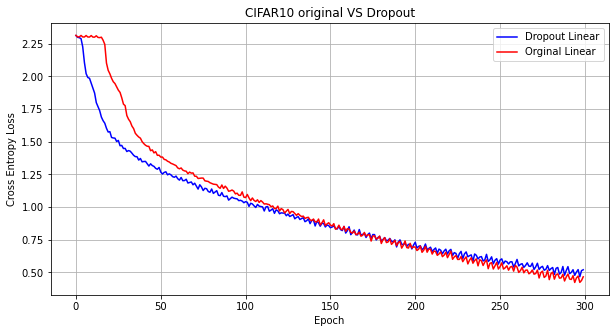

In [ ]:
create_plot(array1 = dropout_loss1, array2 = regular_loss, label1 = "Dropout Linear", label2 = "Orginal Linear", x_label = "Epoch", y_label = "Cross Entropy Loss", title = "CIFAR10 original VS Dropout")

# Task 3

Use your MyLinear module like before, but this time compare the loss curves of two runs: keep_prob = 1 and keep_prob = 0.5.

In [ ]:
# You code for Task 3 goes here. Note - you don't have to copy the entire network here, just modify everything in place, run it, and collect the losses. Then, here write your plots.

# Creating the network 
netDropout2 = myCNN(0.5).cuda()     # -- For GPU

print('Start Training for dropour net 2')
dropout_loss2 = train(netDropout2, cifar10_trainloader)

Start Training for dropour net 2
[1,   201] loss: 2.314
[1,   401] loss: 2.302
[1,   601] loss: 2.302
[2,   201] loss: 2.313
[2,   401] loss: 2.301
[2,   601] loss: 2.301
[3,   201] loss: 2.310
[3,   401] loss: 2.297
[3,   601] loss: 2.296
[4,   201] loss: 2.299
[4,   401] loss: 2.277
[4,   601] loss: 2.268
[5,   201] loss: 2.239
[5,   401] loss: 2.214
[5,   601] loss: 2.202
[6,   201] loss: 2.198
[6,   401] loss: 2.174
[6,   601] loss: 2.155
[7,   201] loss: 2.153
[7,   401] loss: 2.129
[7,   601] loss: 2.122
[8,   201] loss: 2.114
[8,   401] loss: 2.102
[8,   601] loss: 2.102
[9,   201] loss: 2.098
[9,   401] loss: 2.084
[9,   601] loss: 2.073
[10,   201] loss: 2.089
[10,   401] loss: 2.062
[10,   601] loss: 2.052
[11,   201] loss: 2.063
[11,   401] loss: 2.038
[11,   601] loss: 2.043
[12,   201] loss: 2.042
[12,   401] loss: 2.023
[12,   601] loss: 2.027
[13,   201] loss: 2.034
[13,   401] loss: 2.013
[13,   601] loss: 2.012
[14,   201] loss: 2.014
[14,   401] loss: 2.007
[14,   601

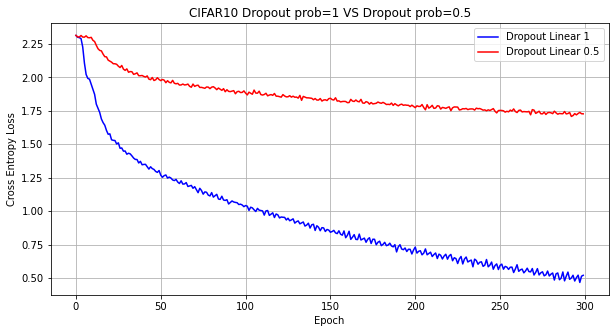

In [ ]:
create_plot(dropout_loss1, dropout_loss2, "Dropout Linear 1", "Dropout Linear 0.5", "Epoch", "Cross Entropy Loss", "CIFAR10 Dropout prob=1 VS Dropout prob=0.5")

# Task 4

Implement a Module that performs Batch Normalization for the output of a Linear Module. In a nutshel, in it's forward procedure, this module should standartize the input (assumed to be of the same shape you use with nn.Linear, that is, (N, L) = N is the number of vectors in the batch, and L is the input vector), and then multiply it by gamma and add beta. Gamma and beta should be learnable, i.e., of nn.Parameter type.
Use running average to calculate the relevant information for testing time, and store them accordingly.

In [ ]:
# TODO: Implement the following Module. Size is the length of the input vectors.

class MyBatchNorm(nn.Module):
  def __init__(self, size, epsilon=1e-05):
    super(MyBatchNorm, self).__init__()
    
    self.size = size
    self.epsilon = epsilon

    self.gama = nn.Parameter(torch.randn(1, 1))
    self.beta = nn.Parameter(torch.randn(1, 1))

    self.mean_forward = torch.zeros(self.size)
    self.sigma_forward = torch.zeros(self.size)
    self.batch_total = torch.zeros(self.size)
    
    # print(self.mean_forward.device)

  def forward(self, x):
    self.mean_forward = self.mean_forward.to(x.device)
    self.sigma_forward = self.sigma_forward.to(x.device)
    self.batch_total = self.batch_total.to(x.device)

    if torch.is_grad_enabled():
      mean = torch.mean(x, dim = 0)
      sigma = torch.var(x, dim = 0)
      x_top = (x - mean)
      x_bottom = torch.sqrt(sigma + self.epsilon)
      normal_x = x_top / x_bottom
      x = normal_x * self.gama + self.beta

      self.batch_total = self.batch_total + 1
      self.mean_forward =  ((self.mean_forward + mean) * (self.batch_total - 1)) / self.batch_total
      self.sigma_forward =  ((self.sigma_forward + sigma) * (self.batch_total - 1)) / self.batch_total

    else:
      x_top = (x - self.mean_forward)
      x_bottom = torch.sqrt(self.sigma_forward + self.epsilon)
      x = x_top / x_bottom

    return x


# Task 5
You should add your new MyBatchNorm Module to our CNN, right after fc1. Then, train the network over CIFAR10 with and without your Module, and compare the loss curves (plot both of them onto the same figure, with two different colors).

In [ ]:
# You code for Task 5 goes here. Note - you don't have to copy the entire network here, just modify everything in place, run it, and collect the losses. Then, here write your plots.
class MyBatchCNN(nn.Module):
  def __init__(self, keep_prob):
    super(MyBatchCNN, self).__init__()

    self.conv1 = nn.Conv2d(3, 6, 5)
    self.conv2 = nn.Conv2d(6, 16, 5)

    # replace fc1..3
    self.fc1 = MyLinear(input_dim = 16 * 5 * 5, output_dim = 120, keep_prob = keep_prob)
    self.myBatchNorm = MyBatchNorm(120)
    self.fc2 = MyLinear(input_dim = 120, output_dim = 84, keep_prob = keep_prob)
    self.fc3 = MyLinear(input_dim = 84, output_dim = 10, keep_prob = keep_prob)

  def forward(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    #  add batch norm 
    x = self.myBatchNorm(x)
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def num_flat_features(self, x):
    size = x.size()[1:]  # all dimensions except the batch dimension
    num_features = 1
    for s in size:
      num_features *= s
    return num_features


In [ ]:
# Creating the network 
netBatchNorm = MyBatchCNN(1).cuda()     # -- For GPU

print('Start Training for batch norm net')
batch_norm_loss = train(netBatchNorm, cifar10_trainloader)

Start Training for batch norm net
[1,   201] loss: 2.180
[1,   401] loss: 1.905
[1,   601] loss: 1.716
[2,   201] loss: 1.540
[2,   401] loss: 1.488
[2,   601] loss: 1.441
[3,   201] loss: 1.376
[3,   401] loss: 1.361
[3,   601] loss: 1.316
[4,   201] loss: 1.300
[4,   401] loss: 1.262
[4,   601] loss: 1.266
[5,   201] loss: 1.225
[5,   401] loss: 1.219
[5,   601] loss: 1.190
[6,   201] loss: 1.199
[6,   401] loss: 1.182
[6,   601] loss: 1.141
[7,   201] loss: 1.114
[7,   401] loss: 1.133
[7,   601] loss: 1.133
[8,   201] loss: 1.106
[8,   401] loss: 1.112
[8,   601] loss: 1.104
[9,   201] loss: 1.094
[9,   401] loss: 1.076
[9,   601] loss: 1.059
[10,   201] loss: 1.050
[10,   401] loss: 1.043
[10,   601] loss: 1.062
[11,   201] loss: 1.012
[11,   401] loss: 1.029
[11,   601] loss: 1.014
[12,   201] loss: 0.997
[12,   401] loss: 1.004
[12,   601] loss: 1.014
[13,   201] loss: 0.977
[13,   401] loss: 0.971
[13,   601] loss: 0.987
[14,   201] loss: 0.958
[14,   401] loss: 0.954
[14,   60

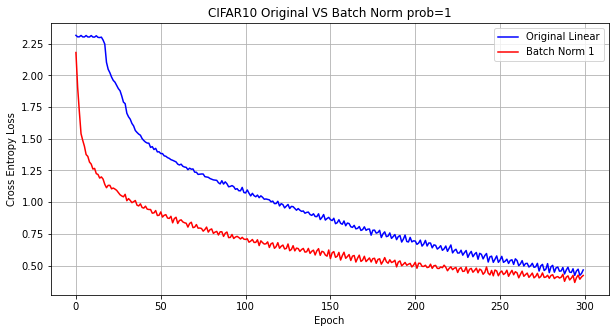

In [ ]:
create_plot(regular_loss, batch_norm_loss, "Original Linear", "Batch Norm 1", "Epoch", "Cross Entropy Loss", "CIFAR10 Original VS Batch Norm prob=1")


# Task 6
Run your network over all training sets, with and without batch norm, as designed in Task 4 and 5.
Present 6 curves, two for each dataset.

In [ ]:
# You code for Task 6 goes here. Note - you don't have to copy the entire network here, just modify everything in place, run it, and collect the losses. Then, here write your plots.
class MyBatchMNIST(nn.Module):
  def __init__(self, keep_prob):
    super(MyBatchMNIST, self).__init__()

    self.conv1 = nn.Conv2d(1, 6, 5)
    self.conv2 = nn.Conv2d(6, 16, 5)

    # replace fc1..3
    self.fc1 = MyLinear(input_dim = 16 * 4 * 4, output_dim = 120, keep_prob = keep_prob)
    self.myBatchNorm = MyBatchNorm(120)
    self.fc2 = MyLinear(input_dim = 120, output_dim = 84, keep_prob = keep_prob)
    self.fc3 = MyLinear(input_dim = 84, output_dim = 10, keep_prob = keep_prob)

  def forward(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    #  add batch norm 
    x = self.myBatchNorm(x)
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def num_flat_features(self, x):
    size = x.size()[1:]  # all dimensions except the batch dimension
    num_features = 1
    for s in size:
      num_features *= s
    return num_features

In [ ]:
class MyMNIST(nn.Module):
  def __init__(self, keep_prob):
    super(MyMNIST, self).__init__()

    self.conv1 = nn.Conv2d(1, 6, 5)
    self.conv2 = nn.Conv2d(6, 16, 5)

    # replace fc1..3
    self.fc1 = MyLinear(input_dim = 16 * 4 * 4, output_dim = 120, keep_prob = keep_prob)
    self.fc2 = MyLinear(input_dim = 120, output_dim = 84, keep_prob = keep_prob)
    self.fc3 = MyLinear(input_dim = 84, output_dim = 10, keep_prob = keep_prob)

  def forward(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def num_flat_features(self, x):
    size = x.size()[1:]  # all dimensions except the batch dimension
    num_features = 1
    for s in size:
      num_features *= s
    return num_features


In [ ]:
fmints_regular = MyMNIST(1).cuda()

print('Start Training for regular fmints net')
regular_fmints_loss = train(fmints_regular, fmnist_trainloader)

Start Training for regular fmints net
[1,   201] loss: 2.311
[1,   401] loss: 2.293
[1,   601] loss: 2.274
[1,   801] loss: 2.053
[2,   201] loss: 1.031
[2,   401] loss: 0.909
[2,   601] loss: 0.858
[2,   801] loss: 0.805
[3,   201] loss: 0.734
[3,   401] loss: 0.729
[3,   601] loss: 0.729
[3,   801] loss: 0.685
[4,   201] loss: 0.671
[4,   401] loss: 0.640
[4,   601] loss: 0.642
[4,   801] loss: 0.629
[5,   201] loss: 0.612
[5,   401] loss: 0.607
[5,   601] loss: 0.593
[5,   801] loss: 0.570
[6,   201] loss: 0.558
[6,   401] loss: 0.546
[6,   601] loss: 0.562
[6,   801] loss: 0.534
[7,   201] loss: 0.537
[7,   401] loss: 0.516
[7,   601] loss: 0.525
[7,   801] loss: 0.515
[8,   201] loss: 0.507
[8,   401] loss: 0.497
[8,   601] loss: 0.505
[8,   801] loss: 0.491
[9,   201] loss: 0.490
[9,   401] loss: 0.465
[9,   601] loss: 0.477
[9,   801] loss: 0.480
[10,   201] loss: 0.478
[10,   401] loss: 0.468
[10,   601] loss: 0.444
[10,   801] loss: 0.450
[11,   201] loss: 0.455
[11,   401] lo

In [ ]:
fmints_btach = MyBatchMNIST(1).cuda()

print('Start Training for batch fmints net')
batch_fmints_loss = train(fmints_btach, fmnist_trainloader)

Start Training for batch fmints net
[1,   201] loss: 2.050
[1,   401] loss: 0.885
[1,   601] loss: 0.599
[1,   801] loss: 0.532
[2,   201] loss: 0.470
[2,   401] loss: 0.429
[2,   601] loss: 0.418
[2,   801] loss: 0.415
[3,   201] loss: 0.382
[3,   401] loss: 0.381
[3,   601] loss: 0.374
[3,   801] loss: 0.369
[4,   201] loss: 0.353
[4,   401] loss: 0.346
[4,   601] loss: 0.341
[4,   801] loss: 0.338
[5,   201] loss: 0.332
[5,   401] loss: 0.326
[5,   601] loss: 0.324
[5,   801] loss: 0.336
[6,   201] loss: 0.317
[6,   401] loss: 0.320
[6,   601] loss: 0.318
[6,   801] loss: 0.311
[7,   201] loss: 0.311
[7,   401] loss: 0.310
[7,   601] loss: 0.301
[7,   801] loss: 0.300
[8,   201] loss: 0.294
[8,   401] loss: 0.299
[8,   601] loss: 0.295
[8,   801] loss: 0.298
[9,   201] loss: 0.280
[9,   401] loss: 0.291
[9,   601] loss: 0.289
[9,   801] loss: 0.286
[10,   201] loss: 0.281
[10,   401] loss: 0.283
[10,   601] loss: 0.285
[10,   801] loss: 0.271
[11,   201] loss: 0.276
[11,   401] loss

In [ ]:
kmints_regular = MyMNIST(1).cuda()

print('Start Training for regular kmints net')
regular_kmints_loss = train(kmints_regular, kmnist_trainloader)

Start Training for regular kmints net
[1,   201] loss: 2.313
[1,   401] loss: 2.297
[1,   601] loss: 2.290
[1,   801] loss: 2.266
[2,   201] loss: 1.685
[2,   401] loss: 1.179
[2,   601] loss: 0.921
[2,   801] loss: 0.809
[3,   201] loss: 0.685
[3,   401] loss: 0.609
[3,   601] loss: 0.571
[3,   801] loss: 0.496
[4,   201] loss: 0.450
[4,   401] loss: 0.413
[4,   601] loss: 0.395
[4,   801] loss: 0.388
[5,   201] loss: 0.359
[5,   401] loss: 0.318
[5,   601] loss: 0.322
[5,   801] loss: 0.308
[6,   201] loss: 0.278
[6,   401] loss: 0.267
[6,   601] loss: 0.267
[6,   801] loss: 0.279
[7,   201] loss: 0.246
[7,   401] loss: 0.236
[7,   601] loss: 0.231
[7,   801] loss: 0.231
[8,   201] loss: 0.219
[8,   401] loss: 0.213
[8,   601] loss: 0.205
[8,   801] loss: 0.197
[9,   201] loss: 0.190
[9,   401] loss: 0.182
[9,   601] loss: 0.192
[9,   801] loss: 0.178
[10,   201] loss: 0.170
[10,   401] loss: 0.180
[10,   601] loss: 0.174
[10,   801] loss: 0.168
[11,   201] loss: 0.164
[11,   401] lo

In [ ]:
kmints_btach = MyBatchMNIST(1).cuda()

print('Start Training for batch kmints net')
batch_kmints_loss = train(kmints_btach, kmnist_trainloader)

Start Training for batch kmints net
[1,   201] loss: 2.208
[1,   401] loss: 1.435
[1,   601] loss: 0.709
[1,   801] loss: 0.496
[2,   201] loss: 0.345
[2,   401] loss: 0.294
[2,   601] loss: 0.262
[2,   801] loss: 0.254
[3,   201] loss: 0.199
[3,   401] loss: 0.192
[3,   601] loss: 0.184
[3,   801] loss: 0.180
[4,   201] loss: 0.158
[4,   401] loss: 0.150
[4,   601] loss: 0.143
[4,   801] loss: 0.131
[5,   201] loss: 0.135
[5,   401] loss: 0.121
[5,   601] loss: 0.120
[5,   801] loss: 0.113
[6,   201] loss: 0.102
[6,   401] loss: 0.106
[6,   601] loss: 0.106
[6,   801] loss: 0.107
[7,   201] loss: 0.092
[7,   401] loss: 0.095
[7,   601] loss: 0.093
[7,   801] loss: 0.093
[8,   201] loss: 0.078
[8,   401] loss: 0.082
[8,   601] loss: 0.074
[8,   801] loss: 0.082
[9,   201] loss: 0.070
[9,   401] loss: 0.069
[9,   601] loss: 0.071
[9,   801] loss: 0.082
[10,   201] loss: 0.061
[10,   401] loss: 0.066
[10,   601] loss: 0.068
[10,   801] loss: 0.066
[11,   201] loss: 0.061
[11,   401] loss

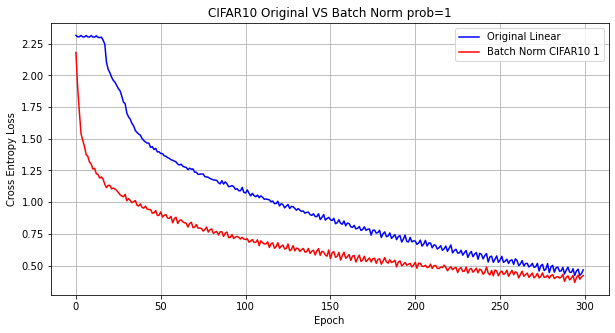

In [ ]:
create_plot(regular_loss, batch_norm_loss, "Original Linear", "Batch Norm CIFAR10 1", "Epoch", "Cross Entropy Loss", "CIFAR10 Original VS Batch Norm prob=1")

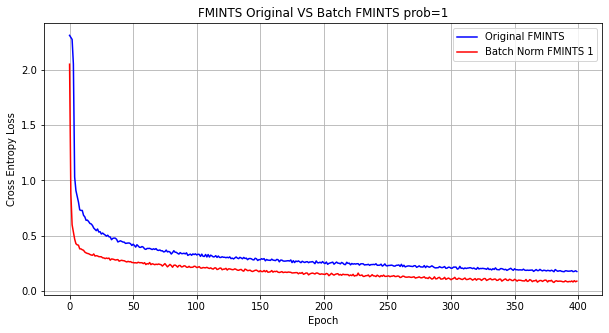

In [ ]:
create_plot(regular_fmints_loss, batch_fmints_loss, "Original FMINTS", "Batch Norm FMINTS 1", "Epoch", "Cross Entropy Loss", "FMINTS Original VS Batch FMINTS prob=1")

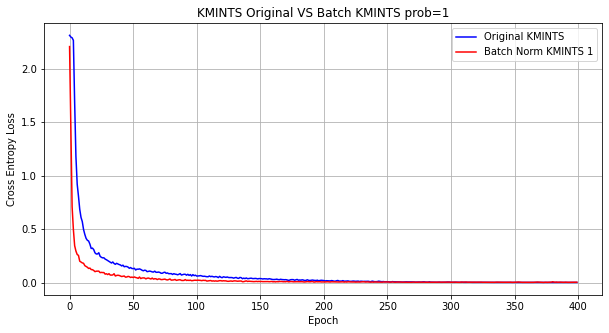

In [ ]:
create_plot(regular_kmints_loss, batch_kmints_loss, "Original KMINTS", "Batch Norm KMINTS 1", "Epoch", "Cross Entropy Loss", "KMINTS Original VS Batch KMINTS prob=1")